In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Importing the Dependencies

Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv("/content/car data.csv")

In [ ]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [ ]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [ ]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [ ]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
print(X_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
204  2015          4.430       28282          0            0             0   
249  2016          7.600       17000          0            0             0   
277  2015         13.600       21780          0            0             0   
194  2008          0.787       50000          0            1             0   
244  2013          9.400       49000          1            0             0   
..    ...            ...         ...        ...          ...           ...   
75   2015          6.800       36000          0            0             0   
22   2011          8.010       50000          0            0             1   
72   2013         18.610       56001          0            0             0   
15   2016         10.790       43000          1            0             0   
168  2013          0.730       12000          0            1             0   

     Owner  
204      0  
249      0  
277      0  
194      0 

In [ ]:
print(Y_train)

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64


In [ ]:
print(X_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0    

In [ ]:
print(Y_test)

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


Model Training

1. Linear Regression

In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

*Model* Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


Visualize the actual prices and Predicted prices

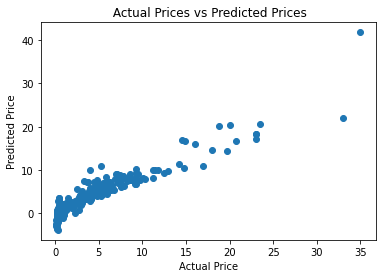

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [ ]:
# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


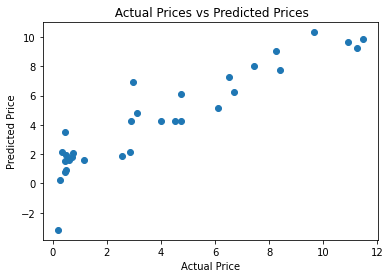

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


Visualize the actual prices and Predicted prices

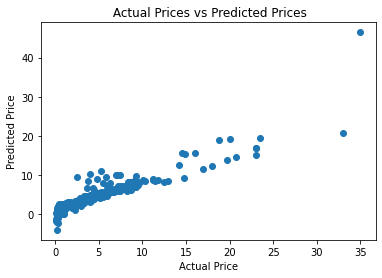

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


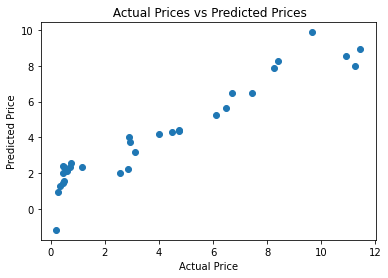

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

** **bold text**DECISION** TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
# prediction on Training data
training_decision = regressor.predict(X_train)

In [ ]:
#prediction on testing data
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
99,9.65,9.25
161,0.45,0.75
89,4.75,4.00
30,3.10,3.10
232,11.45,9.70
290,4.50,5.30
35,2.95,2.65
7,6.50,7.45
183,0.27,0.25
13,6.10,5.80


In [ ]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
#Accuarcy for training
from sklearn.metrics import r2_score
score = r2_score(Y_train, training_decision)
print("Accuracy:",score)

Accuracy: 1.0


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, y_pred)
print("Accuracy:",score)

Accuracy: 0.9484532916396169


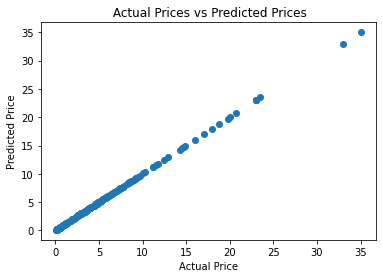

In [ ]:
plt.scatter(Y_train, training_decision)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

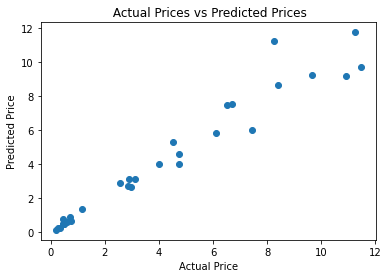

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
import numpy as np
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1       # add a 1 if the cutoff was breached

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_classes = np.zeros_like(y_pred)
y_test_classes[Y_test > cutoff] = 1

In [ ]:
confusion_matrix(y_test_classes, y_pred_classes)


array([[ 8,  1],
       [ 1, 21]])

In [ ]:
print(metrics.classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89         9
         1.0       0.95      0.95      0.95        22

    accuracy                           0.94        31
   macro avg       0.92      0.92      0.92        31
weighted avg       0.94      0.94      0.94        31



KNN

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
training_knn = regressor.predict(X_train)

In [ ]:
testing_knn = regressor.predict(X_test)

In [ ]:
df_knn = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':testing_knn})
df_knn

,Real Values,Predicted Values
99,9.65,9.25
161,0.45,0.75
89,4.75,4.00
30,3.10,3.10
232,11.45,9.70
290,4.50,5.30
35,2.95,2.65
7,6.50,7.45
183,0.27,0.25
13,6.10,5.80


In [ ]:
#Accuarcy for training
from sklearn.metrics import r2_score
score_knn = r2_score(Y_train, training_knn)
print("Accuracy:",score)

Accuracy: 1.0


In [ ]:
#Accuarcy for training
from sklearn.metrics import r2_score
score_knn = r2_score(Y_test, testing_knn)
print("Accuracy:",score)



Accuracy: 1.0


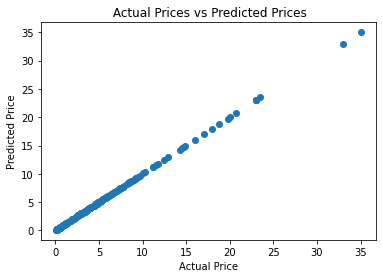

In [ ]:
plt.scatter(Y_train,training_knn)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

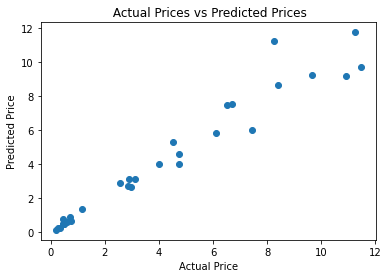

In [ ]:
plt.scatter(Y_test,testing_knn)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()